In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# metricas usadas para classificacao
from sklearn.metrics import confusion_matrix

colunas = ["idx",
           "clump_thickness",            
           "uniformity_cell_size",    
           "uniformity_cell_shape",   
           "marginal_adhesion",          
           "single_epithelial_cell_size",
           "bare_nuclei",                
           "bland_chromatin",            
           "normal_nucleoli",            
           "mitoses",                    
           "class"]
           
dados = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None, names = colunas)

In [ ]:
dados.head()

,idx,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# removendo as linhas com dados faltantes
dados = dados.replace({'?': np.nan})
dados = dados.dropna()

# separando os dados
X = dados.drop(['idx', 'class'], axis = 1)
y = np.array(dados['class'], dtype = 'str')
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=10)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
# Usamos a estrutura dataframe da biblioteca pandas para melhor apresentar a matriz de confusao
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predito benigno","Predito maligno",],
             index  =["Verdadeiro benigno", "Verdadeiro maligno"])

,Predito benigno,Predito maligno
Verdadeiro benigno,87,2
Verdadeiro maligno,3,45


# 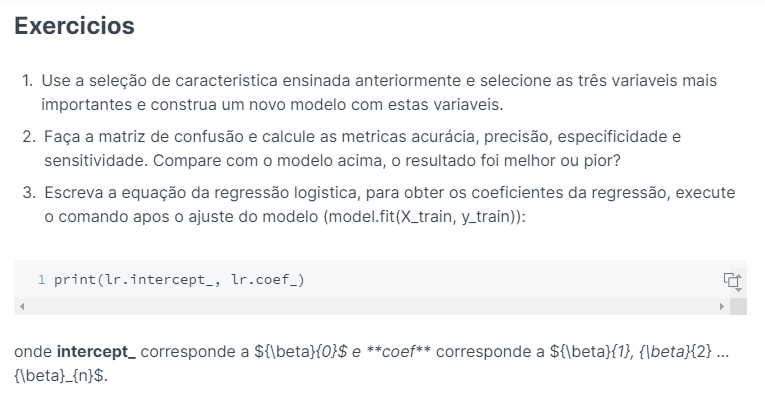

### 1.

In [ ]:
seletor = RFE(LogisticRegression(random_state=42),n_features_to_select = 3, step = 1).fit(X,y)

In [ ]:
seletor.get_feature_names_out()

array(['uniformity_cell_shape', 'bland_chromatin', 'mitoses'],
      dtype=object)

In [ ]:
X = X[seletor.get_feature_names_out()]
X_std = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=10)

modelo2 = LogisticRegression(random_state=42)
modelo2.fit(X_train, y_train)
y_pred = modelo2.predict(X_test)

### 2.

In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predito benigno","Predito maligno",],
             index  =["Verdadeiro benigno", "Verdadeiro maligno"])

,Predito benigno,Predito maligno
Verdadeiro benigno,87,2
Verdadeiro maligno,6,42


Acurácia:   
$$
Acuracia = \frac{87+42}{87+42+6+2} = 0.9416
$$

Precisão:   
$$
Precisao = \frac{42}{42+2} = 0.9545
$$

Especificidade:   
$$
Especificidade = \frac{87}{87+2} = 0.9775
$$

Sensitividade:   
$$
Sensitividade = \frac{42}{42+6} = 0.875
$$

O resultado indica uma piora na sensitividade, isso significa que o modelo piora na predição de valores verdadeiros positivos. Concluimos que o modelo <b><u>perde</b></u> desempenho.

In [ ]:
print(round((42)/(42+6),4))

0.875


### 3.

In [ ]:
print(modelo2.intercept_, modelo2.coef_)

[-0.52980577] [[2.91175835 1.92969891 1.12032833]]


$$
f(x) = \frac {1}{1+e^{-0.52980577 + 2.91175835*x1 + 1.92969891*x2 + 1.12032833*x3}}
$$